In [1]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [2]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

In [3]:
# Import dataset for training using Pandas
news = pd.read_csv('datasets/scraped.csv')
text = news['text'].astype('U')
label = news['label'].astype('U')


In [4]:
check_nan_in_df = news.isnull()
print (check_nan_in_df)

        text  label
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
48300  False  False
48301  False  False
48302  False  False
48303  False  False
48304  False  False

[48305 rows x 2 columns]


In [5]:
# Splitting the dataset into test and train
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=7)

In [6]:
# Insert spliitted data into TfidfVectorizer and transform shape
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, lowercase=True)

In [7]:
transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)
filename_vectorizer = 'TfidfVectorizer-new.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb')) # Saving model

Accuracy Score: 94.56%
K Fold Accuracy: 80.39%

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4964
           1       0.94      0.95      0.94      4697

    accuracy                           0.95      9661
   macro avg       0.95      0.95      0.95      9661
weighted avg       0.95      0.95      0.95      9661


Confusion Matrix
[[4653  311]
 [ 215 4482]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


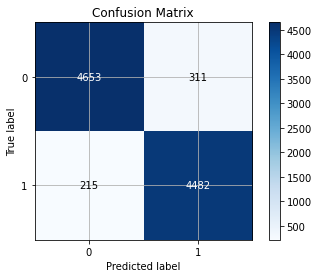

In [8]:
# Initialize Classifier
classifier = PassiveAggressiveClassifier(max_iter=100)

classifier.fit(transformed_text_train, label_train)

# Start Predict
predict = classifier.predict(transformed_text_test)

filename = 'ClassifierModel-new.sav'
pickle.dump(classifier, open(filename, 'wb')) # Saving model

# Get Accuracy Score
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100))

X = vectorizer.transform(text)
kscore = cross_val_score(classifier, X, label.values, cv=5)
print(f'K Fold Accuracy: {round(kscore.mean()*100,2)}%')

print("\nClassification Report")
print(classification_report(label_test, predict))

print("\nConfusion Matrix")
print(confusion_matrix(label_test, predict))

plot_cmat(label_test, predict) # Show Confusion Matrix

accuracy:   0.760
[[4750  214]
 [2106 2591]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


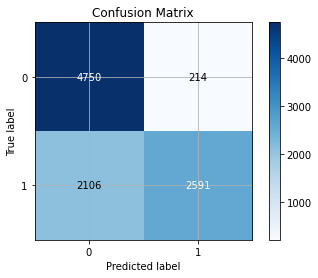

In [9]:
#Applying Naive Bayes
naive_classifier = MultinomialNB() 
naive_classifier.fit(transformed_text_train, label_train)                       # Fit Naive Bayes classifier according to X, y
pred = naive_classifier.predict(transformed_text_test)                     # Perform classification on an array of test vectors X.
naive_score = metrics.accuracy_score(label_test, pred)
print("accuracy:   %0.3f" % naive_score)
cm = metrics.confusion_matrix(label_test, pred)
print(cm)
plot_cmat(label_test, pred) # Show Confusion Matrix

In [10]:
df_true = pd.read_csv('datasets/True.csv')
df_true['label'] = 'Real'
df_true_rep=[df_true['text'][i].replace('WASHINGTON (Reuters) - ','').replace('LONDON (Reuters) - ','').replace('(Reuters) - ','') for i in range(len(df_true['text']))]
df_true['text'] = df_true_rep
df_fake = pd.read_csv('datasets/Fake.csv')
df_fake['label'] = 'Fake'
df_fake

#test = pd.read_csv('datasets/scraped.csv')
#test = test.drop(['id','title', 'author'], axis=1)
#test

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [11]:
def findlabel(newtext):
    vec_newtest = vectorizer.transform([newtext])
    test_predict = classifier.predict(vec_newtest)
    return test_predict[0]

In [12]:
findlabel((df_true['text'][0]))

'0'

In [13]:
# Run test dataset
sum([1 if findlabel((df_true['text'][i]))=='0' else 0 for i in range(len(df_true['text']))])/df_true['text'].size

0.7657468366251109

In [14]:
sum([1 if findlabel((df_fake['text'][i]))=='1' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size

0.6353647629998722